In [1]:
'''
analyzing experiment result for semi_50_one_layer_pinv

Records:
Batch: 150
Epoch: 
Accuracy: 
NMF reconstruction error: 

Problems need to be fixed:

'''
save_PATH = '../saved_data/'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio

In [3]:
data_loc = '../20news_formatted'
X = sio.loadmat(data_loc)
data = X['X'].T

In [9]:
126*150

18900

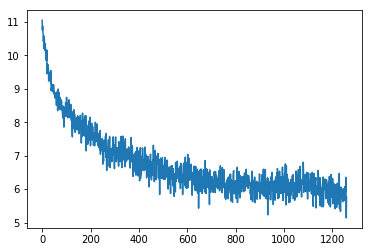

In [4]:
## supervised_one_layer
file_name = 'semi_50_one_layer_pinv.npz'
X = np.load(save_PATH + file_name)
S = X['S']
A = X['param_lst'][0]
loss_lst = X['loss_lst']
plt.plot(loss_lst)
plt.show()

In [6]:
fro_error, fro_X = calc_reconstruction_error(1000*data,A,S)
print(fro_error, fro_X)
print(fro_error/fro_X)

11679482414.281738 18846000000.0
0.6197326973512542


In [5]:
def calc_reconstruction_error(X,A,S):
    '''
    Compute the relative reconstruction error
    
    ---- Inputs:
    X: sparse numpy matrix
    A: numpy array
    S: numpy array
    ---- Outputs:
    fro_error
    fro_X
    '''
    fro_error = 0
    fro_X = 0
    n = X.shape[0]
    if n%100 == 0:
        batch_num = n//100
    else:
        batch_num = n//100 + 1
    for i in range(batch_num):
        try:
            X_ = X[i*100:(i+1)*100].todense()      
            temp = np.linalg.norm(X_ - S[i*100:(i+1)*100]@A)
            temp_X = np.linalg.norm(X_)
        except:
            X_ = X[i*100:].todense()  
            temp = np.linalg.norm(X_ - S[i*100:]@A)
            temp_X = np.linalg.norm(X_)
        fro_error += temp**2
        fro_X += temp_X**2
    return fro_error, fro_X
